## Import Packages and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import statsmodels.api as sm
from sklearn import datasets ## imports datasets from scikit-learn
data = datasets.load_boston() ## loads Boston dataset from datasets library

## Load Data into Pandas DataFrame

In [4]:
# define the data/predictors as the pre-set feature names  
df = pd.DataFrame(data.data, columns=data.feature_names)
# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(data.target, columns=["MEDV"])

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
target.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


## Get Our X and Y

In [7]:
X = df["RM"] 
y = target["MEDV"] 
X = sm.add_constant(X) ## this package needs to manually add an intercept (beta_0)

In [8]:
X

,const,RM
0,1.0,6.575
1,1.0,6.421
2,1.0,7.185
3,1.0,6.998
4,1.0,7.147
...,...,...
501,1.0,6.593
502,1.0,6.120
503,1.0,6.976
504,1.0,6.794


In [9]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

## Fit the Model

In [10]:
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

In [11]:
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 23 Feb 2022   Prob (F-statistic):           2.49e-74
Time:                        15:41:14   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Make Predictions

In [12]:
## Make predictions
predictions = model.predict(X)
print(predictions[:5])

0    25.175746
1    23.774021
2    30.728032
3    29.025938
4    30.382152
dtype: float64


## We can plot the data and the fitted line

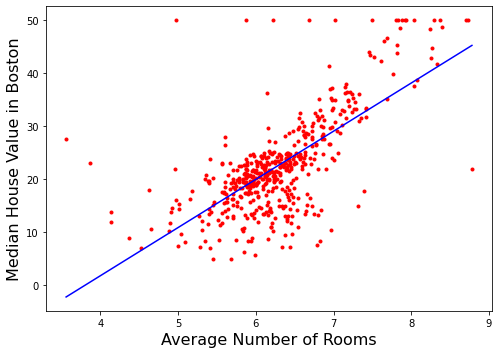

In [13]:
X_p = np.array(X['RM'])
y_p = np.array(y)
x_values = np.array([X_p.max(), X_p.min()])
y_values = model.predict(sm.add_constant(x_values))

plt.figure(figsize=(8,5.6))
plt.plot(X_p, y_p,'ro',ms=3)
plt.plot(x_values, y_values, color = 'blue')
plt.xlabel('Average Number of Rooms', fontsize = 16)
plt.ylabel('Median House Value in Boston', fontsize = 16)
plt.show()

## We can also use the sklearn package

In [14]:
from sklearn import linear_model

X = np.array(df["RM"]).reshape(-1, 1)
y = target["MEDV"]

lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [15]:
# we see that we get the same results
print(model.intercept_)
print(model.coef_[0]) 

-34.67062077643857
9.10210898118031


In [16]:
# Make predictions
predictions = lm.predict(X)
print(predictions[:5])

[25.17574577 23.77402099 30.72803225 29.02593787 30.38215211]


## Sklearn package does not calculate the t statistics. We can manually calculate it. This is t for $\beta_1$

In [17]:
n = len(X)
predictions = lm.predict(X) # predicted values (y hat)
s_sq = (sum((y-predictions)**2))/(n-2) # estimate of sigma squared (df=n-2)

params = np.append(lm.intercept_,lm.coef_) # (beta_0, beta_1)
L_xx = sum(X**2)- n* np.mean(X)**2
t = params[1] * np.sqrt(L_xx) / np.sqrt(s_sq)

print(t)

[21.72203351]


## Manually calculate P-value

In [18]:
from scipy import stats
p_value =2*(1-stats.t.cdf(np.abs(t),n-2))
print(p_value)

[0.]


## Manually calculate confidence intervals

In [19]:
print(params[1] + stats.t.ppf(0.975, n-2) * np.sqrt(s_sq) / np.sqrt(L_xx))
print(params[1] - stats.t.ppf(0.975, n-2) * np.sqrt(s_sq) / np.sqrt(L_xx))

[9.92536292]
[8.27885504]
